Carga y exploracion inicial de datos 

Se importan al notebook las librería necesarias para el proyecto 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

# Verifica si el archivo existe
if os.path.exists("data/datos_retail.csv"):
    print("El archivo existe.")
else:
    print("El archivo NO existe. Verifica la ruta o genera el archivo nuevamente.")

El archivo NO existe. Verifica la ruta o genera el archivo nuevamente.


In [4]:
df_mart = pd.read_csv("../Data/datos_retail.csv")

In [5]:
df_mart.head(2)

,ID_Cliente,Edad,Género,Fecha_Compra,Monto_Compra,Producto_Categoría,Método_Pago,Ubicación_Tienda,Promoción,Frecuencia_Compra
0,1,56,Otro,2020-01-01,414.01,Hogar,Débito,Norte,No,Regular
1,2,69,Otro,2020-01-02,185.32,Ropa,Tarjeta de Crédito,Norte,Sí,Regular


Información genral del datset

In [6]:
df_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_Cliente          1000 non-null   int64  
 1   Edad                1000 non-null   int64  
 2   Género              1000 non-null   object 
 3   Fecha_Compra        1000 non-null   object 
 4   Monto_Compra        1000 non-null   float64
 5   Producto_Categoría  1000 non-null   object 
 6   Método_Pago         1000 non-null   object 
 7   Ubicación_Tienda    1000 non-null   object 
 8   Promoción           1000 non-null   object 
 9   Frecuencia_Compra   1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


Información estadistica

In [7]:
df_mart.describe()

,ID_Cliente,Edad,Monto_Compra
count,1000.000000,1000.00000,1000.000000
mean,500.500000,43.81900,251.304810
std,288.819436,14.99103,139.440868
min,1.000000,18.00000,10.090000
25%,250.750000,31.00000,126.815000
50%,500.500000,44.00000,252.535000
75%,750.250000,56.00000,371.800000
max,1000.000000,69.00000,498.570000


Revisión de valores faltantes

In [9]:
df_mart.isnull().sum()

ID_Cliente            0
Edad                  0
Género                0
Fecha_Compra          0
Monto_Compra          0
Producto_Categoría    0
Método_Pago           0
Ubicación_Tienda      0
Promoción             0
Frecuencia_Compra     0
dtype: int64

#Limpieza y prerocesamiento de datos

1.- Manejo de valores faltantes

In [10]:
print("Valores faltantes por columna")
df_mart.isnull().sum()

Valores faltantes por columna


ID_Cliente            0
Edad                  0
Género                0
Fecha_Compra          0
Monto_Compra          0
Producto_Categoría    0
Método_Pago           0
Ubicación_Tienda      0
Promoción             0
Frecuencia_Compra     0
dtype: int64

No existen valores faltantes en el dataset

2.- Corrección de tipos de datos

In [12]:
print("Tipo de datos")
df_mart.dtypes

Tipo de datos


ID_Cliente              int64
Edad                    int64
Género                 object
Fecha_Compra           object
Monto_Compra          float64
Producto_Categoría     object
Método_Pago            object
Ubicación_Tienda       object
Promoción              object
Frecuencia_Compra      object
dtype: object

El dato 'Frecuencia-compra' tiene un tipo 'object' por lo que lo camiaremos a un tipo de dato 'datetime'

In [13]:
df_mart['Frecuencia_Compra'] = pd.to_datetime(df_mart['Fecha_Compra'])

Verificamos si se realizo la conversión 

In [15]:
print("Tipo de datos")
df_mart.dtypes

Tipo de datos


ID_Cliente                     int64
Edad                           int64
Género                        object
Fecha_Compra                  object
Monto_Compra                 float64
Producto_Categoría            object
Método_Pago                   object
Ubicación_Tienda              object
Promoción                     object
Frecuencia_Compra     datetime64[ns]
dtype: object

Se realizó la conversión de datos

3.- Detección de outliers

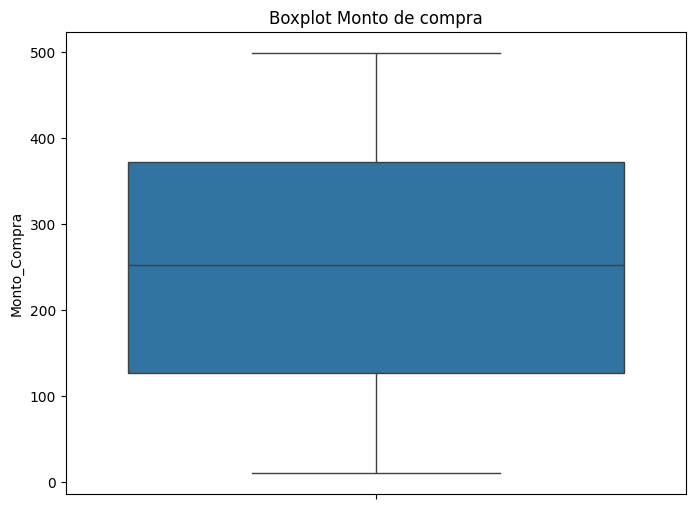

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df_mart['Monto_Compra'])
plt.title("Boxplot Monto de compra")
plt.show()

Los datos tienen una distribucíon simétrica y existe poca disperción de datos. No existen valores outliers en el dataset

4. Transformación de datos

Crearemos una columna 'Año' a partir de 'Fecha_compra'

In [26]:
df_mart['Año'] = df_mart['Frecuencia_Compra'].dt.year

In [27]:
print("Dataset con la nueva columna 'Año")
df_mart.head()

Dataset con la nueva columna 'Año


,ID_Cliente,Edad,Género,Fecha_Compra,Monto_Compra,Producto_Categoría,Método_Pago,Ubicación_Tienda,Promoción,Frecuencia_Compra,Anio,Año
0,1,56,Otro,2020-01-01,414.01,Hogar,Débito,Norte,No,2020-01-01,2020,2020
1,2,69,Otro,2020-01-02,185.32,Ropa,Tarjeta de Crédito,Norte,Sí,2020-01-02,2020,2020
2,3,46,Otro,2020-01-03,167.83,Electrónica,Tarjeta de Crédito,Centro,Sí,2020-01-03,2020,2020
3,4,32,Masculino,2020-01-04,488.96,Hogar,Efectivo,Norte,No,2020-01-04,2020,2020
4,5,60,Otro,2020-01-05,108.42,Ropa,Débito,Norte,Sí,2020-01-05,2020,2020


#4 Análisis exploratorio de datos (EDA)